<div style="background-image:url(instaseis_images/meschede-seismic-waves.png); padding: 10px 30px 20px 30px; background-size:cover; background-opacity:50%; border-radius:5px; background-position: 0px -200px">
<p style="float:right; margin-top:20px; padding: 20px 60px 0px 10px; background:rgba(255,255,255,0.75); border-radius:10px;">
<img width="400px" src=instaseis_images/logo.png>
</p>

<h1 style="color:#BBB; padding-bottom: 10px">Instaseis Tutorial</h1>
<h2 style="color:#BBB; padding-bottom: 60px">Part 1: Introduction</h2>

</div>

**Goal:** calculate seismograms on a 1D background model with [Instaseis](http://www.instaseis.net), assuming the 
Green's function database computed with [AxiSEM](http://www.axisem.info) is provided.

### Overview:

**Introduction:**

* Part 1: Very basic introduction to the API, calculate the first seismogram.

**Basic Tasks:**

* Part 2: Some examples of interaction with obspy, calculate synthetics for a set of events and stations

**Advanced Tasks:**

* Part 3: Plot record section
* Part 4: Finite Source, compare to point source solution

-----

Basic lines to set up the notebook and some paths.

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import obspy
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 8)

-----

## Basic Instaseis API Introduction

Please also have a look at our webpage - http://www.instaseis.net/ - where everything is documented extensively.

### Opening a Database

To get going you have to import the package `instaseis`.

In [2]:
import instaseis

An Instaseis database must be opened before it can be used. Please keep in mind that this is by far the most expensive operation in Instaseis so you want to limit how often you do it. There are a couple of optional parameters here, for most applications the defaults might be fine.

The database for this turorial is located at **./data/database**

In [3]:
db = instaseis.open_db("data/database")

Some basic information about the loaded database can be reviewed by just printing it.

In [4]:
print(db)

InstaseisDB reciprocal Green's function Database (v7) generated with these parameters:
	components           : vertical and horizontal
	velocity model       : ak135f
	attenuation          : True
	dominant period      : 20.000 s
	dump type            : displ_only
	excitation type      : dipole
	time step            : 4.997 s
	sampling rate        : 0.200 Hz
	number of samples    : 721
	seismogram length    : 3598.1 s
	source time function : gauss_0
	source shift         : 34.982 s
	spatial order        : 4
	min/max radius       : 6221.0 - 6371.0 km
	Planet radius        : 6371.0 km
	min/max distance     : 0.0 - 180.0 deg
	time stepping scheme : newmark2
	compiler/user        : gfortran 4.8.2 by vandriel on D-14-L-12
	directory/url        : data/database
	size of netCDF files : 914.9 MB
	generated by AxiSEM version v1.2-2-g9c86 at 2015-05-07T14:45:41.000000Z



From this you can already glance a couple of aspects of the database used for this tutorial:

* uses ak135f as its 1D model
* is accurate for periods down to 20 seconds
* includes vertical and horizontal components
* sources can have depths ranging from 0 to 150 km
* one hour long seismograms

### Receivers and Sources

Instaseis calculates seismograms for any source and receiver pair. A receiver has coordinates and optionally network and station codes. Using a reciprocal database, all receivers are assumed to be at the same depth, i.e. usually at the Earth surface.

In [5]:
rec = instaseis.Receiver(latitude=44.06238, longitude=10.59698,
                         network="IV", station="BDI")
print(rec)

Instaseis Receiver:
	longitude :   10.6 deg
	latitude  :   44.1 deg
	network   : IV
	station   : BDI
	location  : 



Sources are naturally a bit more complex and Instaseis offers a variety of ways to define them. A straightforward way for earthquakes is to pass coordinates, moment as well as strike, dip and rake.

In [6]:
src = instaseis.Source.from_strike_dip_rake(
    latitude=27.77, longitude=85.37, depth_in_m=12000.0,
    M0=1e+21, strike=32., dip=62., rake=90.)
print(src)

Instaseis Source:
	origin time      : 1970-01-01T00:00:00.000000Z
	Longitude        :   85.4 deg
	Latitude         :   27.8 deg
	Depth            : 1.2e+01 km
	Moment Magnitude :   8.00
	Scalar Moment    :   1.00e+21 Nm
	Mrr              :   8.29e+20 Nm
	Mtt              :  -2.33e+20 Nm
	Mpp              :  -5.96e+20 Nm
	Mrt              :   2.96e+20 Nm
	Mrp              :   4.74e+20 Nm
	Mtp              :  -3.73e+20 Nm



**Sidenode:** The moment tensor can be visualized using the Beachball function from obspy.imaging:

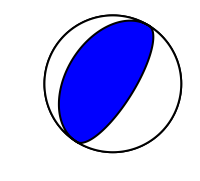

In [8]:
from obspy.imaging.beachball import Beachball

mt = src.tensor / src.M0 # normalize the tensor to avoid problems in the plotting
Beachball(mt, size=200, linewidth=2, facecolor='b');

Now we are ready to extract synthetic seismograms from the database. The return type is an [obspy stream object](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html), which can directly be plotted:

3 Trace(s) in Stream:
IV.BDI..LXZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:59:23.120951Z | 0.2 Hz, 714 samples
IV.BDI..LXN | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:59:23.120951Z | 0.2 Hz, 714 samples
IV.BDI..LXE | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:59:23.120951Z | 0.2 Hz, 714 samples


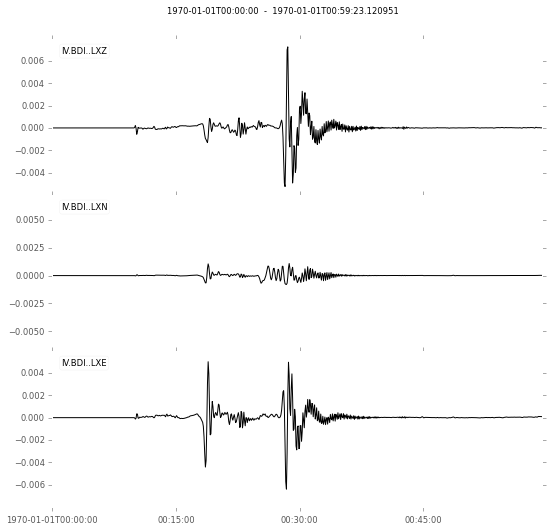

In [9]:
st = db.get_seismograms(source=src, receiver=rec)
print(st)
st.plot();

**Done** This is all you need for a basic usage of Instaseis!

## Outlook: syngine

We are currently working with IRIS on providing instaseis synthetics on the web ([syngine](http://ds.iris.edu/ds/products/syngine/)), it is currently in alpha testing stage. Very soon it will be possible to open a remote database hosted by Iris as:

In [ ]:
db = instaseis.open_db("syngine://ak135f")
print(db)